<a href="https://colab.research.google.com/github/alexandre-ss/nlp/blob/main/classificacao_contrato.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Classificação de atos de contrato e licitação


---


 

*   Foi desenvolvida uma tarefa de classificação utilizando como base o corpus de contratos e licitações extraídos do Diário Oficial do Distrito Federal
*   Todo o projeto foi baseado em notebooks disponibilizados pelo professor Vinícius.


---



---





1 - Instalação das ferramentas a serem utilizadas

In [ ]:
!pip install -U keras
!pip install -U tensorflow

     |████████████████████████████████| 462 kB 4.2 MB/s 


2 - Import das bibliotecas necessárias

In [ ]:
from keras.models import Sequential
from keras.layers import Dense,Activation
from tensorflow.keras.optimizers import SGD
from sklearn.metrics import classification_report
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split

In [ ]:
import pandas as pd
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.model_selection import train_test_split

3 - Leitura do arquivo csv. Nota-se que é necessário incluí-lo no diretório raíz do projeto, previamente.

In [ ]:
original_df = pd.read_csv('contratos_idato.csv')

In [ ]:
df = original_df
df

,id_ato,id_dodf,tipo_rel,id_rel,anotador_rel,timestamp_rel,tipo_ent,id_ent,anotador_ent,timestamp_ent,offset,length,texto
0,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,numero_termo_aditivo,275,matheus_santos,2022-03-04T15:34:41Z,372969,20,QUARTO TERMO ADITIVO
1,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,numero_contrato,276,matheus_santos,2022-03-04T15:34:41Z,373005,8,002/2018
2,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,orgao_contratante,277,matheus_santos,2022-03-04T15:34:41Z,373098,8,DF/RA II
3,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,objeto_aditamento_contratual,278,matheus_santos,2022-03-04T15:34:41Z,373238,481,O presente Termo Aditivo objetiva a alteracao ...
4,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,processo_gdf,434,matheus_santos,2022-04-02T22:45:46Z,373072,16,0131-000016/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,vigencia_contrato,6,alexandre_santana,2022-02-22T02:34:10Z,478144,17,04 (quatro) meses
6692,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,valor_contrato,5,alexandre_santana,2022-02-22T02:34:10Z,478173,9,"76.500,00"
6693,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,data_assinatura_contrato,149,alexandre_santana,2022-03-08T12:03:37Z,478086,10,07/08/2019
6694,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,objeto_contrato,150,alexandre_santana,2022-03-08T12:03:37Z,478106,26,aquisicao de fita eletrica


4 - Pré processamento da coluna de interesse.


*   Remoção de colunas que não teriam utilidade.

In [ ]:
df['texto_preproc'] = df['texto'].apply(lambda x: x.lower())
df.drop(labels=['id_ato', 'id_dodf', 'id_rel', 'timestamp_rel', 'anotador_rel', 'timestamp_ent', 'offset', 'length'], axis=1)

,tipo_rel,tipo_ent,id_ent,anotador_ent,texto,texto_preproc
0,REL_ADITAMENTO_CONTRATO,numero_termo_aditivo,275,matheus_santos,QUARTO TERMO ADITIVO,quarto termo aditivo
1,REL_ADITAMENTO_CONTRATO,numero_contrato,276,matheus_santos,002/2018,002/2018
2,REL_ADITAMENTO_CONTRATO,orgao_contratante,277,matheus_santos,DF/RA II,df/ra ii
3,REL_ADITAMENTO_CONTRATO,objeto_aditamento_contratual,278,matheus_santos,O presente Termo Aditivo objetiva a alteracao ...,o presente termo aditivo objetiva a alteracao ...
4,REL_ADITAMENTO_CONTRATO,processo_gdf,434,matheus_santos,0131-000016/2018,0131-000016/2018
...,...,...,...,...,...,...
6691,REL_EXTRATO_CONTRATO,vigencia_contrato,6,alexandre_santana,04 (quatro) meses,04 (quatro) meses
6692,REL_EXTRATO_CONTRATO,valor_contrato,5,alexandre_santana,"76.500,00","76.500,00"
6693,REL_EXTRATO_CONTRATO,data_assinatura_contrato,149,alexandre_santana,07/08/2019,07/08/2019
6694,REL_EXTRATO_CONTRATO,objeto_contrato,150,alexandre_santana,aquisicao de fita eletrica,aquisicao de fita eletrica


In [ ]:
from nltk.tokenize import RegexpTokenizer
tokenizer = RegexpTokenizer(r'|\w+|\S+|')
df['texto_preproc'] = df['texto_preproc'].apply(lambda x: ' '.join(tokenizer.tokenize(x)))
df

,id_ato,id_dodf,tipo_rel,id_rel,anotador_rel,timestamp_rel,tipo_ent,id_ent,anotador_ent,timestamp_ent,offset,length,texto,texto_preproc
0,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,numero_termo_aditivo,275,matheus_santos,2022-03-04T15:34:41Z,372969,20,QUARTO TERMO ADITIVO,quarto termo aditivo
1,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,numero_contrato,276,matheus_santos,2022-03-04T15:34:41Z,373005,8,002/2018,002 /2018
2,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,orgao_contratante,277,matheus_santos,2022-03-04T15:34:41Z,373098,8,DF/RA II,df /ra ii
3,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,objeto_aditamento_contratual,278,matheus_santos,2022-03-04T15:34:41Z,373238,481,O presente Termo Aditivo objetiva a alteracao ...,o presente termo aditivo objetiva a...
4,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,processo_gdf,434,matheus_santos,2022-04-02T22:45:46Z,373072,16,0131-000016/2018,0131 -000016/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,vigencia_contrato,6,alexandre_santana,2022-02-22T02:34:10Z,478144,17,04 (quatro) meses,04 (quatro) meses
6692,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,valor_contrato,5,alexandre_santana,2022-02-22T02:34:10Z,478173,9,"76.500,00","76 .500,00"
6693,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,data_assinatura_contrato,149,alexandre_santana,2022-03-08T12:03:37Z,478086,10,07/08/2019,07 /08/2019
6694,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,objeto_contrato,150,alexandre_santana,2022-03-08T12:03:37Z,478106,26,aquisicao de fita eletrica,aquisicao de fita eletrica


5 - Para cada tipo de relatório, foi dado um valor inteiro, sendo ele de 0 a 5
- Foi feita a transformação da tabela de interesse em uma representação one-hot-encoding, utilizando 6 bits

In [ ]:
df['tipo_rel'] = pd.Categorical(df['tipo_rel'])
y_train = df['tipo_rel'].cat.codes

In [ ]:
from keras.utils.np_utils import to_categorical

num_classes = 6
y_train, y_test = train_test_split(y_train, test_size=0.1, random_state=26)

y_train_enc = to_categorical(y_train,num_classes)

6 - Retirar stopwords (de, para, o, a e etc)

In [ ]:
import nltk
nltk.download('stopwords')
stopwords = nltk.corpus.stopwords.words('portuguese')
df['texto_preproc'] = df['texto_preproc'].apply(lambda x: ' '.join([termo for termo in x.split() if termo not in stopwords]))
df

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!


,id_ato,id_dodf,tipo_rel,id_rel,anotador_rel,timestamp_rel,tipo_ent,id_ent,anotador_ent,timestamp_ent,offset,length,texto,texto_preproc
0,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,numero_termo_aditivo,275,matheus_santos,2022-03-04T15:34:41Z,372969,20,QUARTO TERMO ADITIVO,quarto termo aditivo
1,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,numero_contrato,276,matheus_santos,2022-03-04T15:34:41Z,373005,8,002/2018,002 /2018
2,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,orgao_contratante,277,matheus_santos,2022-03-04T15:34:41Z,373098,8,DF/RA II,df /ra ii
3,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,objeto_aditamento_contratual,278,matheus_santos,2022-03-04T15:34:41Z,373238,481,O presente Termo Aditivo objetiva a alteracao ...,presente termo aditivo objetiva alteracao cont...
4,22_20.12.2019.1-R5,22_20.12.2019.1,REL_ADITAMENTO_CONTRATO,R5,matheus_santos,2022-04-02T22:45:52Z,processo_gdf,434,matheus_santos,2022-04-02T22:45:46Z,373072,16,0131-000016/2018,0131 -000016/2018
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6691,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,vigencia_contrato,6,alexandre_santana,2022-02-22T02:34:10Z,478144,17,04 (quatro) meses,04 (quatro) meses
6692,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,valor_contrato,5,alexandre_santana,2022-02-22T02:34:10Z,478173,9,"76.500,00","76 .500,00"
6693,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,data_assinatura_contrato,149,alexandre_santana,2022-03-08T12:03:37Z,478086,10,07/08/2019,07 /08/2019
6694,8_13.8.2019-R5,8_13.8.2019,REL_EXTRATO_CONTRATO,R5,alexandre_santana,2022-03-08T12:03:42Z,objeto_contrato,150,alexandre_santana,2022-03-08T12:03:37Z,478106,26,aquisicao de fita eletrica,aquisicao fita eletrica


7 - Utilização do método Term Frequeny-Inverse Document Frequency (TF-IDF)

Como somente foi fornecido um dataset para treino, teste e validação, este foi separado da seguinte forma:
- 70% dos valores para o treino
- 20% dos valores para validação
- 10% dos valores para teste

In [ ]:
tfidfvectorizer = TfidfVectorizer(norm=None, max_df=0.95, min_df=2)
tfidfvectorizer.fit(df['texto_preproc'])
tfidf_train = tfidfvectorizer.transform(df['texto_preproc']).toarray()

N = tfidf_train.shape[0]
vocab_size = tfidf_train.shape[1]


In [ ]:
X_train, X_test = train_test_split(tfidf_train, test_size=0.1, random_state=26)
X_train, X_valid, y_train, y_valid = train_test_split(X_train, y_train_enc, test_size=0.2, random_state=26)

print(X_train.shape)
print(X_valid.shape)
print(X_test.shape)

print(y_train.shape)
print(y_valid.shape)
print(y_test.shape)

(4820, 6854)
(1206, 6854)
(670, 6854)
(4820, 6)
(1206, 6)
(670,)


# Deep Neural Network

A partir de testes, foi verificado que seria interessante uma rede neural com 4 camadas.

 - Foram feitos testes com outras funções de ativação, mas a que desempenhou melhor foi a tangente hiperbólica.

In [ ]:
number_of_neurons_layer1 = 30
number_of_neurons_layer2 = 24
number_of_neurons_layer3 = 18
number_of_neurons_layer4 = 12

In [ ]:
model = Sequential()
model.add(Dense(number_of_neurons_layer1,input_dim=vocab_size, activation="tanh"))
model.add(Dense(number_of_neurons_layer2,activation="tanh"))
model.add(Dense(number_of_neurons_layer3,activation="tanh"))
model.add(Dense(number_of_neurons_layer4,activation="tanh"))

model.add(Dense(6,activation="sigmoid"))

8 - Ajuste da taxa de aprendizagem e o cálculo da função loss

In [ ]:
sgd = SGD(learning_rate=0.001)
model.compile(loss="categorical_crossentropy",optimizer=sgd,metrics=['accuracy'])
history_fine = model.fit(X_train,y_train,validation_data=(X_valid,y_valid),epochs=50)

Epoch 1/50
151/151 [==============================] - 1s 5ms/step - loss: 1.7041 - accuracy: 0.3052 - val_loss: 1.6049 - val_accuracy: 0.4096
Epoch 2/50
151/151 [==============================] - 1s 4ms/step - loss: 1.5484 - accuracy: 0.4330 - val_loss: 1.4915 - val_accuracy: 0.4751
Epoch 3/50
151/151 [==============================] - 1s 4ms/step - loss: 1.4531 - accuracy: 0.4961 - val_loss: 1.4129 - val_accuracy: 0.5158
Epoch 4/50
151/151 [==============================] - 1s 4ms/step - loss: 1.3836 - accuracy: 0.5095 - val_loss: 1.3527 - val_accuracy: 0.5174
Epoch 5/50
151/151 [==============================] - 1s 4ms/step - loss: 1.3285 - accuracy: 0.5154 - val_loss: 1.3035 - val_accuracy: 0.5274
Epoch 6/50
151/151 [==============================] - 1s 4ms/step - loss: 1.2826 - accuracy: 0.5191 - val_loss: 1.2618 - val_accuracy: 0.5315
Epoch 7/50
151/151 [==============================] - 1s 4ms/step - loss: 1.2426 - accuracy: 0.5257 - val_loss: 1.2249 - val_accuracy: 0.5373
Epoch 

9 - Assim como nos notebooks disponibilizados, foi feita a verificação com o fim de observar o comportamento da função loss

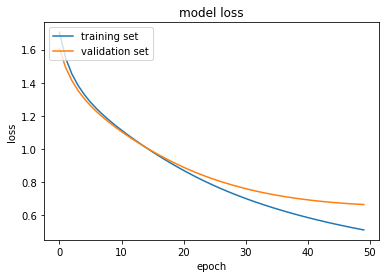

In [ ]:
loss = history_fine.history['loss']
val_loss = history_fine.history['val_loss']


plt.plot(history_fine.history['loss'])
plt.plot(history_fine.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['training set','validation set'], loc='upper left')
plt.show()

Nota-se que a curva de loss do aprendizado e treinamento do modelo tende a zero, o que indica que ao passar das épocas a confiabilidade do modelo aumenta.


---



---



In [ ]:
y_prob = model.predict(X_test)
y_pred = np.argmax(y_prob,axis=1)
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.78      0.91      0.84       266
           1       0.00      0.00      0.00        12
           2       0.80      0.77      0.78       241
           3       0.71      0.62      0.67       144
           4       0.00      0.00      0.00         3
           5       1.00      0.25      0.40         4

    accuracy                           0.77       670
   macro avg       0.55      0.43      0.45       670
weighted avg       0.76      0.77      0.76       670



/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
/usr/local/lib/python3.7/dist-packages/sklearn/metrics/_classification.py:1318: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))


# 11 - Avaliação de performance

O método predict gera uma matriz.
- Cada linha representa um texto relacionado a um contrato.
- Cada coluna de cada linha representa a probabilidade de ser um determinado tipo de contrato.


In [ ]:
y = model.predict(X_test)
y

array([[0.606585  , 0.42138377, 0.63810146, 0.86468995, 0.25222957,
        0.17978379],
       [0.66645014, 0.49261248, 0.960285  , 0.4136745 , 0.24563709,
        0.37192306],
       [0.9749948 , 0.18460038, 0.21973976, 0.70055205, 0.24921623,
        0.21328807],
       ...,
       [0.7877889 , 0.30592835, 0.41118893, 0.92610013, 0.1773628 ,
        0.11450434],
       [0.29763812, 0.6572405 , 0.98362964, 0.5077294 , 0.3586463 ,
        0.45086548],
       [0.946815  , 0.23771867, 0.570248  , 0.56389034, 0.15026593,
        0.20264444]], dtype=float32)